# ListedColormap

Plot values from one of several different colors so that all values within a certain range have the same color.

Based on [Creating listed colormaps](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html#creating-listed-colormaps).

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# %matplotlib widget
%matplotlib inline

from PIL import Image

## 2D arrays (images)

In [2]:
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)

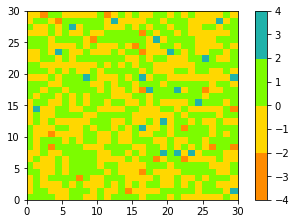

In [3]:
cmap1 = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])
plot_examples([cmap1])

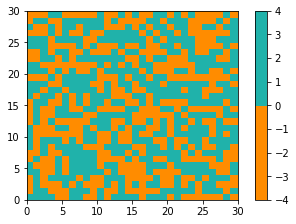

In [4]:
cmap2 = ListedColormap(["darkorange", "lightseagreen"])
plot_examples([cmap2])

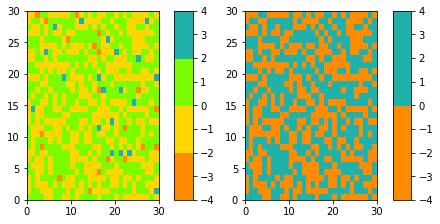

In [5]:
plot_examples([cmap1, cmap2])

## 3D plots

### Helper code

In [6]:
def plot_examples_3d_img(img, colormap=None):
    """
    Helper function to plot data with associated colormap.
    """
    size_x, size_y = img.shape[1], img.shape[0]
    X = range(size_x)
    Y = range(size_y)
    X, Y = np.meshgrid(X, Y)
    Z = img

    fig = plt.figure()
    ax_3d = fig.add_subplot(111, projection='3d')
    if colormap:
        surf = ax_3d.plot_surface(X, Y, Z, cmap=colormap)
    else:
        surf = ax_3d.plot_surface(X, Y, Z)
        
def load_image_as_numpy_array_10bits(file, num_bits_to_shift=6):
    return np.right_shift(
        np.array(Image.open(file)), num_bits_to_shift
    ).astype(np.uint16)

def slice_2D_centered(center, size_x, size_y):
    """Return 2D slice object centered at position `center` with
    specified x and y sizes. All units are in pixels and therefore integers.
    
    Parameters
    ----------
    center: 2 element iterable - y and x coordinates of center of slice
    size_x: int - width of slice
    size_y: int - height of slice
    
    Returns
    -------
    2D slice object
    
    Example
    -------
    test_array = np.array([i for i in range(64)]).reshape((8, 8))
    print(test_array)
    print()
    test_center = (4, 5)
    test_size_x = 4
    test_size_y = 3
    print(f"Center y, x: {test_center}, Value: {test_array[test_center]}")
    print(f"size y & x: {test_size_y}, {test_size_x}")
    s = slice_2D_centered(test_center, test_size_x, test_size_y)
    print(s)
    print()
    print(test_array[s])
    
    # Output
    [[ 0  1  2  3  4  5  6  7]
     [ 8  9 10 11 12 13 14 15]
     [16 17 18 19 20 21 22 23]
     [24 25 26 27 28 29 30 31]
     [32 33 34 35 36 37 38 39]
     [40 41 42 43 44 45 46 47]
     [48 49 50 51 52 53 54 55]
     [56 57 58 59 60 61 62 63]]

    Center y, x: (4, 5), Value: 37
    size y & x: 3, 4
    (slice(3, 6, None), slice(3, 7, None))

    [[27 28 29 30]
     [35 36 37 38]
     [43 44 45 46]]
    """
    assert len(center) == 2
    assert isinstance(size_x, int)
    assert isinstance(size_y, int)

    x1, x2 = convert_size_to_min_max_for_centered_slice(size_x)
    y1, y2 = convert_size_to_min_max_for_centered_slice(size_y)

    xmin, xmax = center[1] + x1, center[1] + x2
    ymin, ymax = center[0] + y1, center[0] + y2

    # print("x:", xmin, xmax)
    # print("y:", ymin, ymax)

    return slice(ymin, ymax), slice(xmin, xmax)

def convert_size_to_min_max_for_centered_slice(size):
    """Utility function to create centered slices of given size
    by calculating min and max values to add to center coordinate
    of slice.
    
    Example
    -------
    test_values = [1, 2, 3, 4, 5, 6, 7, 8]
    for test_value in test_values:
        min_value, max_value = convert_size_to_min_max_for_centered_slice(test_value)
        print(test_value, min_value, max_value, [x for x in range(min_value, max_value)])  
        
    # Output:
    1 0 1 [0]
    2 -1 1 [-1, 0]
    3 -1 2 [-1, 0, 1]
    4 -2 2 [-2, -1, 0, 1]
    5 -2 3 [-2, -1, 0, 1, 2]
    6 -3 3 [-3, -2, -1, 0, 1, 2]
    7 -3 4 [-3, -2, -1, 0, 1, 2, 3]
    8 -4 4 [-4, -3, -2, -1, 0, 1, 2, 3]
    """
    # Validate argument
    assert isinstance(size, int)
    assert size > 0

    if size % 2 == 0:  # size even
        min_value = -size // 2
        max_value = size // 2
    else:  # size odd
        min_value = -size // 2 + 1
        max_value = size // 2 + 1
    return min_value, max_value

def image_center(img, reverse_order=False):
    """Return center of 2D numpy array in (y,x) order. If 
    reverse_order=True, return in (x,y) order. The former
    is used in numpy, the latter in OpenCV.
    """
    temp = tuple([x // 2 for x in img.shape])
    if reverse_order:
        return tuple(reversed(temp))
    else:
        return temp

### Get example image and crop to center region

In [7]:
img = load_image_as_numpy_array_10bits(Path('colormaps_0_0.png')).astype('float')
size_x, size_y = 100, 100
roi = slice_2D_centered(image_center(img), size_x, size_y)
img = img[roi]

### No colormap

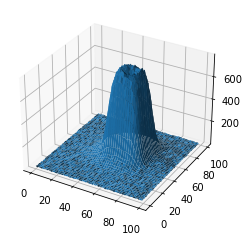

In [8]:
plot_examples_3d_img(img)

### Colormap with 2 colors

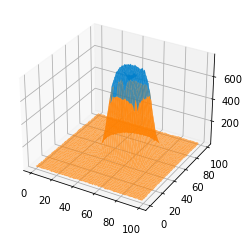

In [9]:
color1 = (1., 0.5, 0, 0.7)
color2 = (0, 0.5, 0.8, 0.7)
cmap_values = np.ones((256, 4))
threshold = 180

cmap_values[:threshold] = color1
cmap_values[threshold:] = color2

cmap4 = ListedColormap(cmap_values)
plot_examples_3d_img(img, cmap4)